# Note:   
It may seem like Gradient Descent itself is performing regression, but it is not. Gradient Descent is merely an optimization algorithm that minimizes the cost function by adjusting the model parameters iteratively. The actual regression model is determined by the chosen function (e.g., linear, polynomial, sigmoid). Gradient Descent simply finds the best-fitting parameters for that function.

Lets take the sigmoid regression **for example**. A sigmoid function is used to generate training data. Then another sigmoid function (with unkown parameters) is optimized by the gradient descent to minimize the difference between predictions and training data.

# Basic Test

In [27]:
from gradient_descent import Gradient_descent
from math_functions import *

In [28]:
def cost_function(x):
    return (x[0] - 3) ** 2

gd = Gradient_descent(learn_rate=0.1, max_iter=100, tolerance=1e-6)

initial_params = [10]

optimized_params = gd.fit(cost_function, initial_params)

print("Optimized Parameters:", optimized_params)
print("Final Cost:", cost_function(optimized_params))
print("History:", gd.history[-5:])

Optimized Parameters: [3.0000004717990665]
Final Cost: 2.225943591328502e-13
History: [(69, [3.0000011518531897], 1.3267657706637855e-12), (70, [3.0000009214825516], 8.491300928974465e-13), (71, [3.000000737186041], 5.434432591924646e-13), (72, [3.000000589748833], 3.4780368588317735e-13), (73, [3.0000004717990665], 2.225943591328502e-13)]


# Test for linear regression

In [29]:
X_train = [1, 2, 3, 4, 5]
y_train = [2, 4, 6, 8, 10]

In [30]:
def cost_function(params):
    w, b = params
    y_pred = [(w * x + b) for x in X_train]
    return MSE(y_train, y_pred)

In [31]:
gd = Gradient_descent(learn_rate=0.01, max_iter=1000, tolerance=1e-6)
optimized_params = gd.fit(cost_function, [0, 0])

print("Optimized Parameters:", optimized_params)
print("Final Cost:", cost_function(optimized_params))

Optimized Parameters: [1.9951803506721477, 0.01740046334000408]
Final Cost: 5.511055187914835e-05


In [32]:
X_test = [6, 7, 8]
y_pred = [optimized_params[0] * x + optimized_params[1] for x in X_test]

print("Predictions:", y_pred)

Predictions: [11.988482567372891, 13.98366291804504, 15.978843268717187]


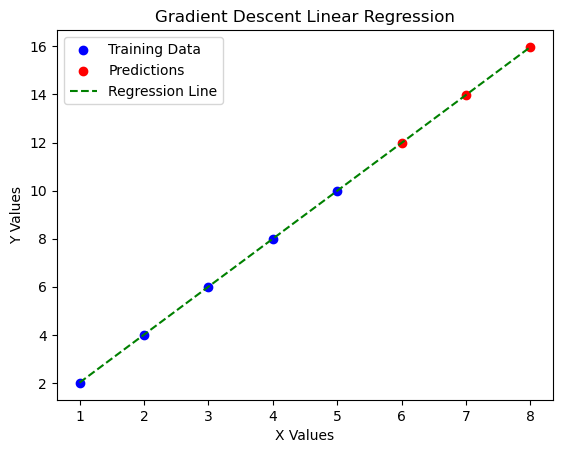

In [33]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='blue', label='Training Data')

plt.scatter(X_test, y_pred, color='red', label='Predictions')

X_range = list(range(min(X_train + X_test), max(X_train + X_test) + 1))
y_range = [optimized_params[0] * x + optimized_params[1] for x in X_range]
plt.plot(X_range, y_range, color='green', linestyle='dashed', label='Regression Line')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Gradient Descent Linear Regression')
plt.legend()
plt.show()

# Multi-linear-regression

In [34]:
def cost_function(params):
    w = params[:-1]
    b = params[-1]
    y_pred = [sum(w_i * x_i for w_i, x_i in zip(w, x)) + b for x in X_train]
    return MSE(y_train, y_pred)

In [35]:
X_train = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]
y_train = [2, 4, 6, 8, 10]

In [36]:
gd = Gradient_descent(learn_rate=0.01, max_iter=1000, tolerance=1e-6)
initial_params = [0.0, 0.0, 0.0]
optimized_params = gd.fit(cost_function, initial_params)

In [37]:
X_test = [[6, 7], [7, 8], [8, 9]]
y_pred = [sum(w_i * x_i for w_i, x_i in zip(optimized_params[:-1], x)) + optimized_params[-1] for x in X_test]
print("Predictions:", y_pred)

Predictions: [11.985909892207738, 13.98017599652841, 15.97444210084908]


In [38]:
final_cost = cost_function(optimized_params)
print("Final Cost:", final_cost)

Final Cost: 7.5437044725299e-05


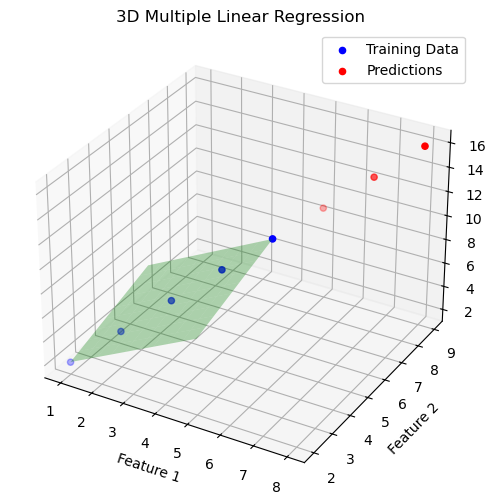

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

X_test_np = np.array(X_test)
y_pred_np = np.array(y_pred)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# traiing
ax.scatter(X_train_np[:, 0], X_train_np[:, 1], y_train_np, color='b', label="Training Data")

# prediction
ax.scatter(X_test_np[:, 0], X_test_np[:, 1], y_pred_np, color='r', label="Predictions")

x1_range = np.linspace(min(X_train_np[:, 0]), max(X_train_np[:, 0]), 10)
x2_range = np.linspace(min(X_train_np[:, 1]), max(X_train_np[:, 1]), 10)
X1, X2 = np.meshgrid(x1_range, x2_range)
Y_pred_surface = optimized_params[0] * X1 + optimized_params[1] * X2 + optimized_params[2]

ax.plot_surface(X1, X2, Y_pred_surface, alpha=0.3, color='g')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title("3D Multiple Linear Regression")

ax.legend()

plt.show()

# Non-linear regressions

### **Quadratic regression**

In [40]:
def cost_function(params):
    a, b, c = params
    y_pred = [(a * x**2 + b * x + c) for x in X_train]
    return MSE(y_train, y_pred)

In [41]:
X_train = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_train = [3, 6, 11, 18, 27, 38, 51, 66, 83, 102]

In [42]:
gd = Gradient_descent(learn_rate=0.0001, max_iter=10000, tolerance=1e-6)
optimized_params = gd.fit(cost_function, params=[1.0, 1.0, 1.0])

print("Optimized Parameters:", optimized_params)
print("Final Cost:", cost_function(optimized_params))

Optimized Parameters: [0.9663649989075702, 0.41683091351980317, 0.9380077928535246]
Final Cost: 0.0819817461599123


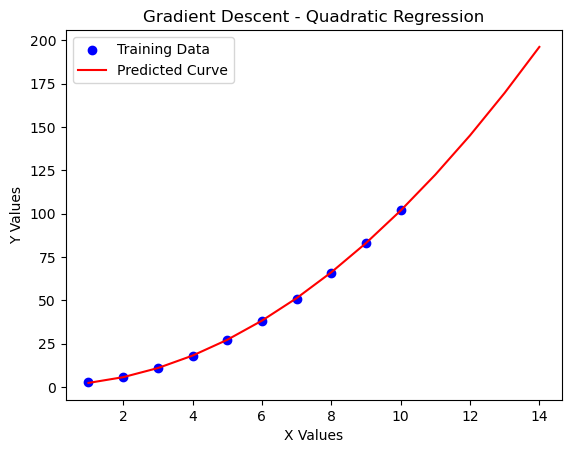

In [43]:
X_test = list(range(1, 15))
y_pred = [(optimized_params[0] * x**2 + optimized_params[1] * x + optimized_params[2]) for x in X_test]

plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.plot(X_test, y_pred, color='red', label="Predicted Curve")
plt.legend()
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Gradient Descent - Quadratic Regression")
plt.show()

### **Exponential regression**

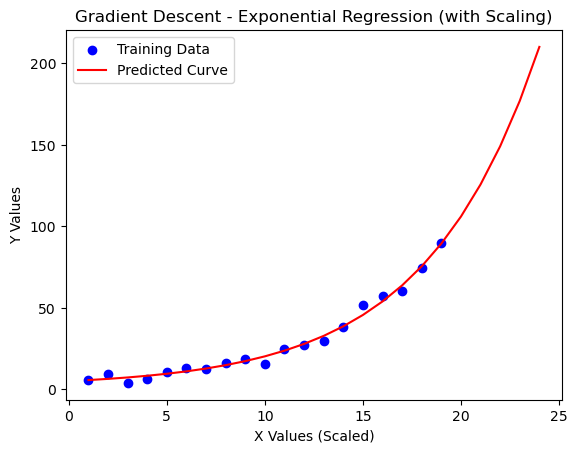

In [ ]:
X_train = [i for i in range(1, 20)]
X_min, X_max = min(X_train), max(X_train)
X_scaled = [(x - X_min) / (X_max - X_min) for x in X_train]  # normalize

y_train = [2 * (2.7 ** (0.2 * x)) + 5 for x in X_train]
y_train = [y + np.random.randn() * 3 for y in y_train]  # add some noise

def cost_function(params):
    a, b, c = params
    y_pred = [a * (2.7 ** (b * x)) + c for x in X_scaled]
    return MSE(y_train, y_pred)

gd = Gradient_descent(learn_rate=0.0005, max_iter=10000, tolerance=1e-6)
optimized_params = gd.fit(cost_function, params=[1.0, 0.01, 1.0])

X_test = list(range(1, 25))
X_test_scaled = [(x - X_min) / (X_max - X_min) for x in X_test]
y_pred = [optimized_params[0] * (2.7 ** (optimized_params[1] * x)) + optimized_params[2] for x in X_test_scaled]

plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.plot(X_test, y_pred, color='red', label="Predicted Curve")
plt.legend()
plt.xlabel("X Values (Scaled)")
plt.ylabel("Y Values")
plt.title("Gradient Descent - Exponential Regression (with Scaling)")
plt.show()

### **Logarithmic regression**

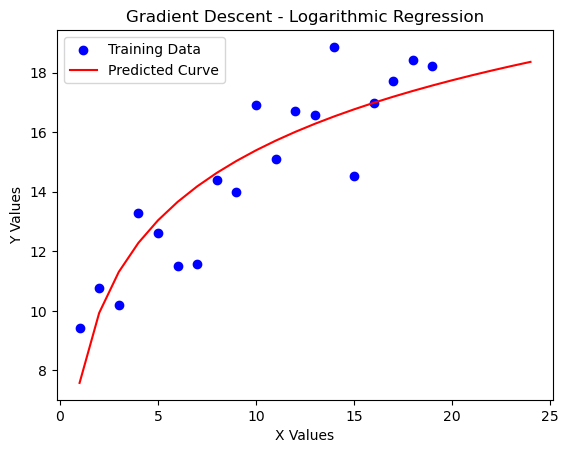

In [57]:
X_train = [i for i in range(1, 20)]
y_train = [3 * np.log(1.5 * x) + 7 + (np.random.randn() * 1.5) for x in X_train]

def cost_function(params):
    a, b, c = params
    y_pred = [a * np.log(b * x) + c for x in X_train]
    return MSE(y_train, y_pred)

gd = Gradient_descent(learn_rate=0.001, max_iter=10000, tolerance=1e-6)
optimized_params = gd.fit(cost_function, params=[1.0, 1.0, 1.0])

X_test = list(range(1, 25))
y_pred = [optimized_params[0] * np.log(optimized_params[1] * x) + optimized_params[2] for x in X_test]

plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.plot(X_test, y_pred, color='red', label="Predicted Curve")
plt.legend()
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Gradient Descent - Logarithmic Regression")
plt.show()

### **Sigmoid regression**

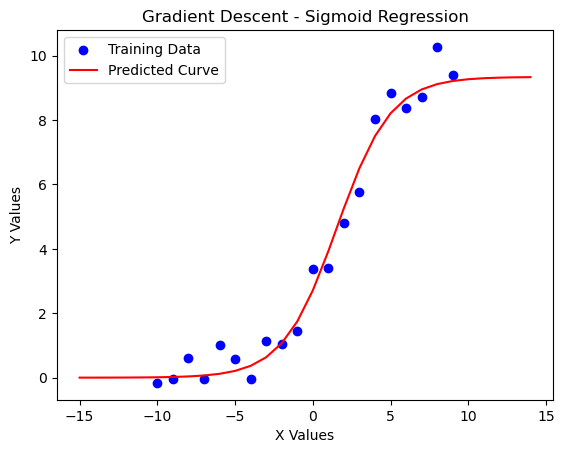

In [58]:
X_train = [i for i in range(-10, 10)]
y_train = [10 / (1 + np.exp(-0.5 * (x - 2))) + np.random.randn() * 0.5 for x in X_train]

def cost_function(params):
    a, b, c = params
    y_pred = [a / (1 + np.exp(-b * (x - c))) for x in X_train]
    return MSE(y_train, y_pred)

gd = Gradient_descent(learn_rate=0.001, max_iter=10000, tolerance=1e-6)
optimized_params = gd.fit(cost_function, params=[1.0, 0.1, 1.0])

X_test = list(range(-15, 15))
y_pred = [optimized_params[0] / (1 + np.exp(-optimized_params[1] * (x - optimized_params[2]))) for x in X_test]

plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.plot(X_test, y_pred, color='red', label="Predicted Curve")
plt.legend()
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Gradient Descent - Sigmoid Regression")
plt.show()